In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

from utils import utils
plt.rcParams['figure.figsize'] = (15, 7) 
%matplotlib inline

In [2]:
tic=timeit.default_timer()
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data.drop('Timestamp',axis=1,inplace = True)
data['Date'] = data.timestamp.dt.date

In [4]:
data = data.set_index('timestamp');

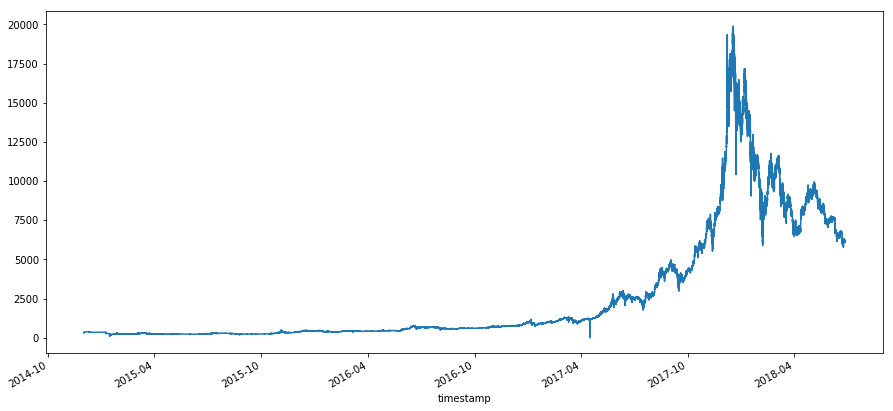

In [5]:
data['Weighted_Price'].plot(figsize=(15, 7));

In [6]:
date = '2018 Mar'

In [7]:
price_array = data.loc[date]['Weighted_Price']

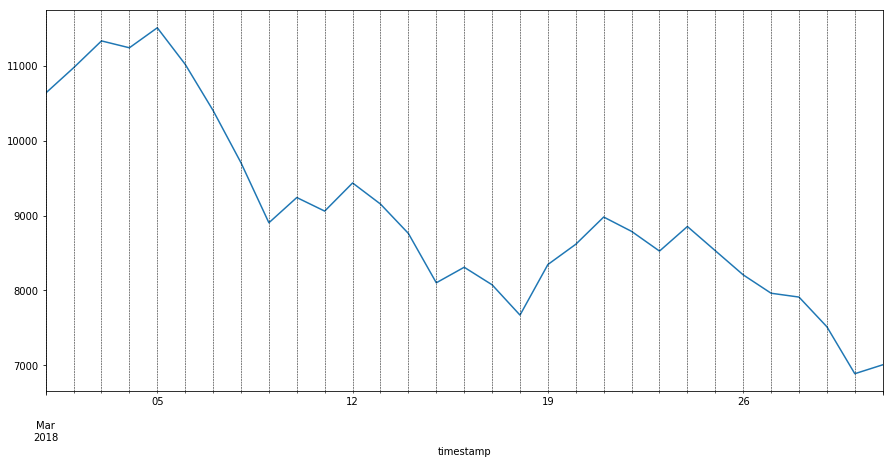

In [8]:
price_array.resample('D').mean().plot(figsize=(15, 7));
sample = price_array.resample('D').mean().index     
for time in sample:
    plt.axvline(x=time,c='k',linewidth=0.5,linestyle='--')
plt.axis(xmin=sample[0] , xmax= sample[-1]);

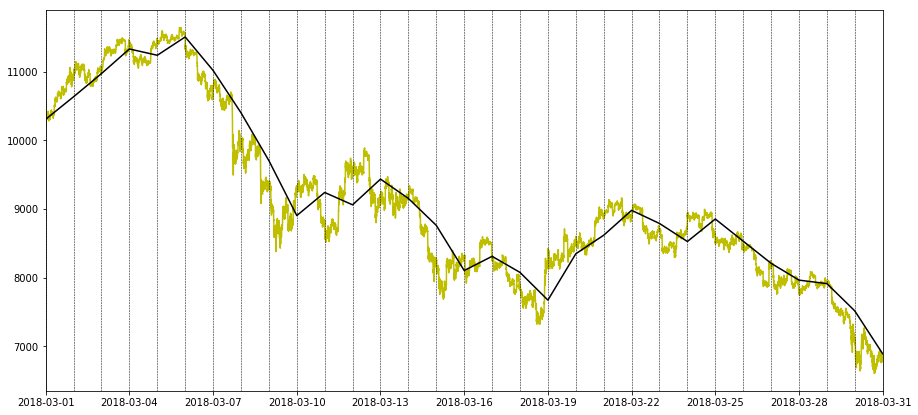

In [9]:
utils.plot_resample(price_array,'D');

In [10]:
DwEvent, UpEvent = utils.event_detector(0.04, price_array)

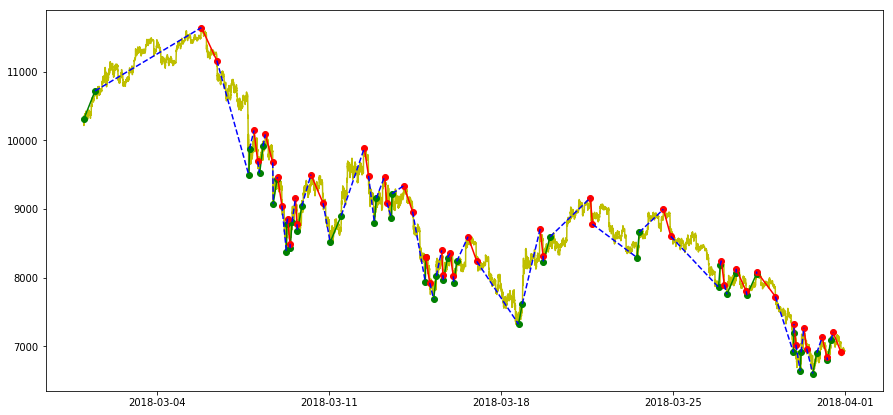

In [11]:
utils.plot_event(price_array,DwEvent,UpEvent);


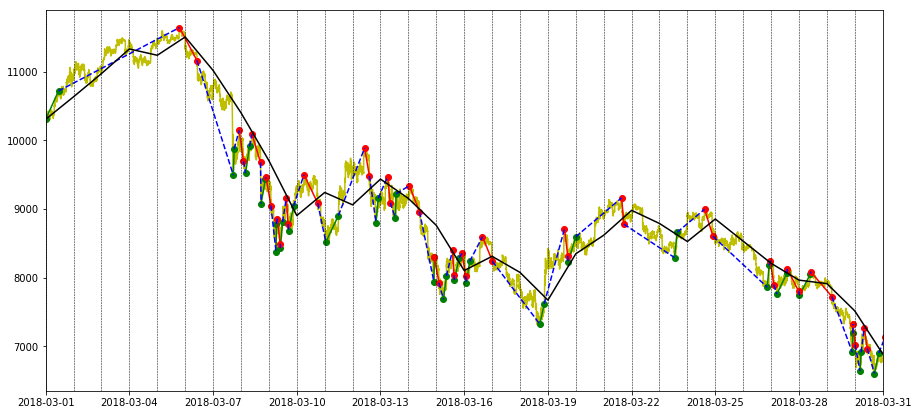

In [12]:
utils.plot_event(price_array,DwEvent,UpEvent,'D');

In [13]:
Dw_dc, Up_dc, Dw_shoot, Up_shoot = utils.event_counter(DwEvent, UpEvent);

In [14]:
table = utils.summary(price_array,'2017 Nov 1',Dw_dc, Up_dc, Dw_shoot, Up_shoot)
for date in pd.date_range(pd.to_datetime('2017 Nov 2'),periods=100,freq='D'):
    price_array = data.loc[str(date).replace(' 00:00:00','')]['Weighted_Price']
    DwEvent, UpEvent = utils.event_detector(0.01, price_array)
    Dw_dc, Up_dc, Dw_shoot, Up_shoot = utils.event_counter(DwEvent, UpEvent);
    table = table.append(utils.summary(price_array,date,Dw_dc, Up_dc, Dw_shoot, Up_shoot));

In [15]:
table['Up_change'].mean()

1.3733663366336633

In [16]:
table['Dw_change'].mean()

1.3218811881188122

In [17]:
table

,Date,Downturn DC,Downturn shoot,Dw_change,Dw_change_mag,Up_change,Up_change_mag,Upturn DC,Upturn shoot
0,2017-11-01,24,23,3.39,297.23,3.73,319.76,24,23
0,2017-11-02,14,13,1.38,97.89,1.43,99.87,14,13
0,2017-11-03,8,7,0.73,52.91,0.84,60.68,8,7
0,2017-11-04,8,7,0.36,25.81,0.46,32.82,7,7
0,2017-11-05,5,4,0.64,47.97,0.70,52.66,5,4
0,2017-11-06,8,7,1.34,96.72,1.48,105.73,8,7
0,2017-11-07,5,5,0.90,63.81,0.95,67.41,6,5
0,2017-11-08,14,14,1.26,94.19,1.34,98.64,15,14
0,2017-11-09,6,5,1.27,92.95,1.26,91.96,5,5
0,2017-11-10,11,10,0.98,66.46,0.98,65.98,11,10


In [18]:
toc=timeit.default_timer()
toc - tic

701.0805179209776